# Mall Customer Segmentation using K-means Clustering




Customer segmentation is a vital strategy for businesses to understand their customer base and target marketing efforts effectively. K-means clustering is a popular unsupervised machine learning technique that groups customers into clusters based on their attributes, such as age, income, and spending score.

###Importing Libraries

Here, we import the necessary libraries. These include:

- **NumPy**: Used for numerical operations.
- **Matplotlib** and **Seaborn**: Libraries for creating visualizations.
- **Pandas**: For data manipulation and analysis.
- **Plotly Express**: To create interactive plots.
- **Warnings**: Filtered to avoid unnecessary warning messages during execution.

In [ ]:
# K-Means Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

The dataset contains customer information such as Age, Annual Income, and Spending Score. This information is crucial for segmentation.
We load the dataset and display its first few rows.
- **`pd.read_csv()`**: Loads the customer data from a CSV file.
- **`dataset.shape`**: Returns the dimensions of the dataset (rows and columns).

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Mall_customers.csv')
dataset.shape

(200, 5)

In [ ]:
dataset.describe()
# check average values

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


- **`isnull()`**: Checks for missing values in each column.
- **`sum()`**: Aggregates the number of missing values per column.
- Ensures data quality before proceeding to clustering.

<Axes: >

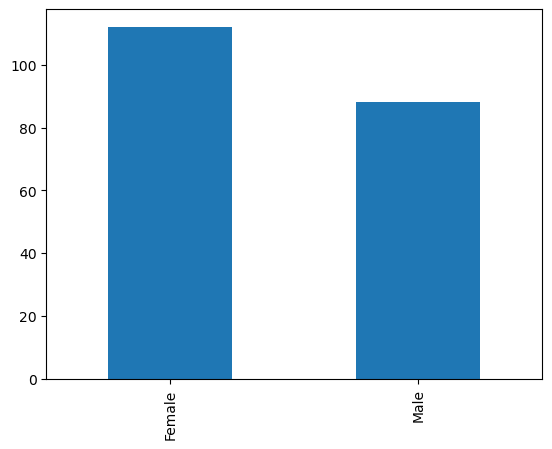

In [ ]:
dataset['Gender'].value_counts().plot(kind = 'bar')
# Female customers are more compared to male customers.

<Axes: xlabel='Age', ylabel='Count'>

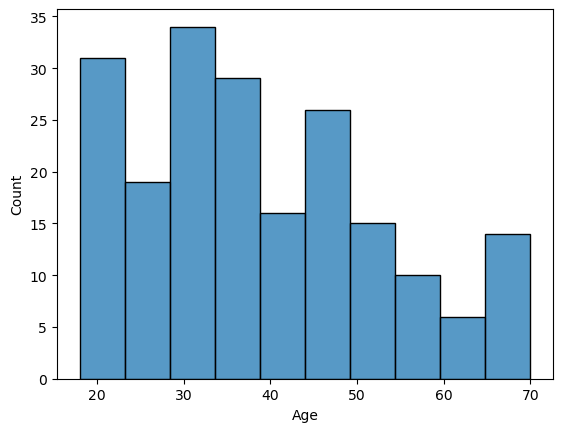

In [ ]:
sns.histplot(dataset['Age'], bins =10)
# Most of the customers are in the 20-40 age group.

### Visalizing the dataset

Text(0, 0.5, 'Spending score')

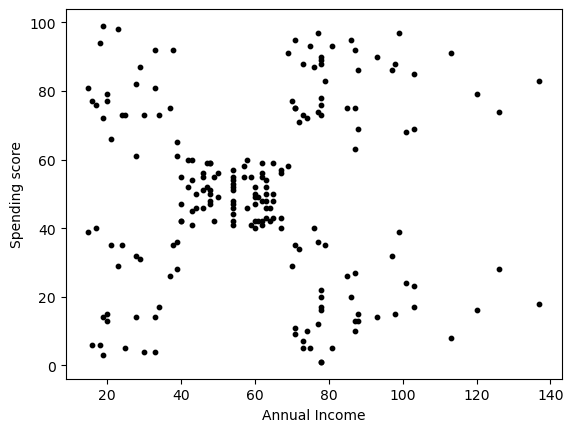

In [ ]:
# visalizing the dataset
plt.scatter(dataset.iloc[:, 3], dataset.iloc[:, 4], s = 10, c = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
# Spending score is high for customers with very low and very high income

Text(0, 0.5, 'Spending score')

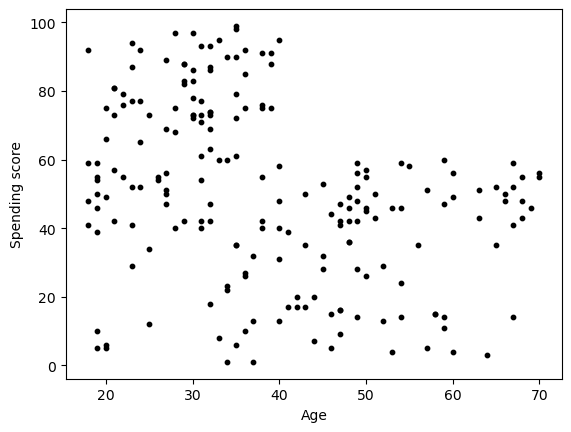

In [ ]:
plt.scatter(dataset.iloc[:, 2], dataset.iloc[:, 4], s = 10, c = 'black')
plt.xlabel('Age')
plt.ylabel('Spending score')
# Spending score is high for the customers in the age group of 20-40

<Axes: >

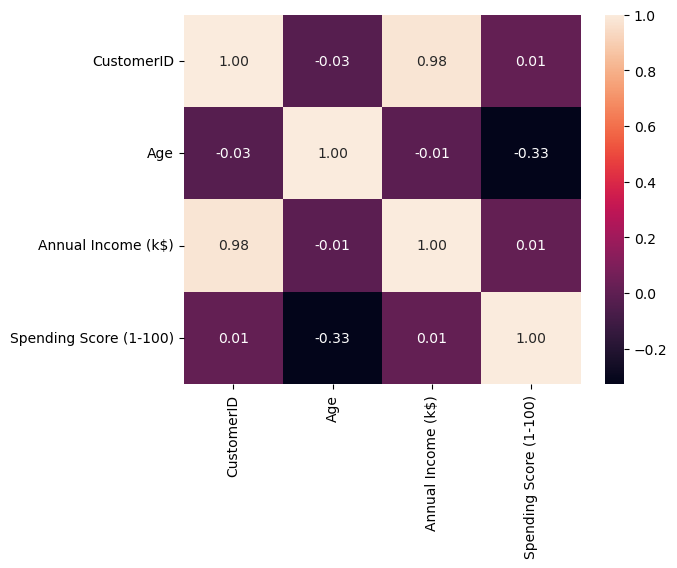

In [ ]:
sns.heatmap(dataset.corr(), annot = True, fmt = '0.2f')

## Applying K-Means Clustering based on annual income

Using the optimal number of clusters, we apply the K-Means algorithm to segment the customers. Each data point is assigned to the nearest cluster.

In [ ]:
data = dataset.iloc[:, [3, 4]].values
# extracting annual income and average spending columns
data.shape

(200, 2)

KMeans method: sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

n_clusters: The number of clusters to form

init: {‘k-means++’, ‘random’}: ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence.

n_init: ‘auto’ or int: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia.

Output attributes are:
1. cluster_centers_ : Coordinates of cluster centers.

2. labels_ : Labels of each point

3. inertia_ : Sum of squared distances of samples to their closest cluster center

4. n_iter_ : Number of iterations run.

In [ ]:
# Using the elbow method to find the optimal number of clusters
# k ranging from 1 to 11
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

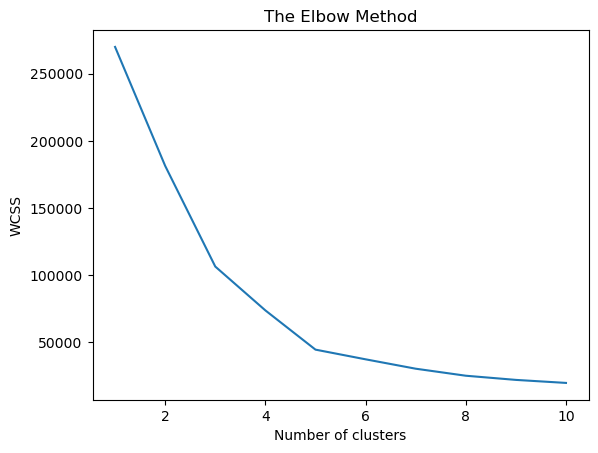

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# The plot shows having 5 clusters is optimal

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10)
labels = kmeans.fit(data)

In [ ]:
# outputs Labels of each point
labels.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [ ]:
labels.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [ ]:
labels.n_iter_

7

In [ ]:
test = [[50,80]]
labels.predict(test)
# outputs cluster index value

array([2])

In [ ]:
df = pd.DataFrame(data, columns = ['annual_income','average_spending'])
df['class_label'] = labels.labels_
df.head(3)

,annual_income,average_spending,class_label
0,15,39,3
1,15,81,2
2,16,6,3


In [ ]:
df.class_label.value_counts()

0    81
1    39
4    35
3    23
2    22
Name: class_label, dtype: int64

Text(0, 0.5, 'average_spending')

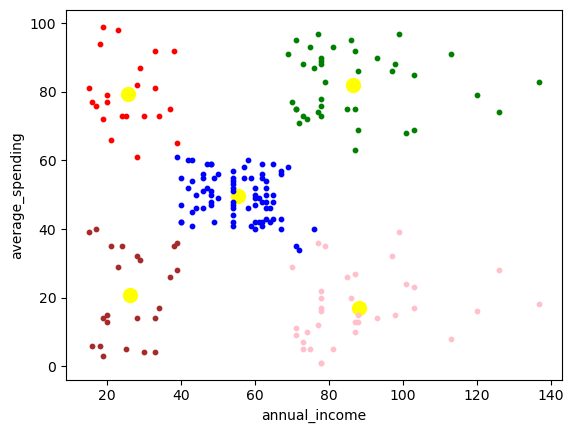

In [ ]:
plt.scatter(labels.cluster_centers_[:, 0], labels.cluster_centers_[:, 1],
            s = 100, c = 'yellow')
k1 = df[df['class_label']== 0]
plt.scatter(k1['annual_income'], k1['average_spending'], s = 10, c = 'blue')
k2 = df[df['class_label']== 1]
plt.scatter(k2['annual_income'], k2['average_spending'], s = 10, c = 'green')
k3 = df[df['class_label']== 2]
plt.scatter(k3['annual_income'], k3['average_spending'], s = 10, c = 'red')
k4 = df[df['class_label']== 3]
plt.scatter(k4['annual_income'], k4['average_spending'], s = 10, c = 'brown')
k5 = df[df['class_label']== 4]
plt.scatter(k5['annual_income'], k5['average_spending'], s = 10, c = 'pink')
plt.xlabel('annual_income')
plt.ylabel('average_spending')

#### Next time when a customer comes, the mall can tailor the strategy to improve the business.

In [ ]:
# Load the data from the CSV file
data = pd.read_csv('Mall_customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Select features
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [ ]:
# Use LabelEncoder
X['Gender'] = X['Gender'].astype('category')
X['Gender'] = X['Gender'].cat.codes

In [ ]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters you want
kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
# Get the cluster labels for each data point
labels = kmeans.labels_

In [ ]:
# Add the cluster labels to the original data
data['Cluster'] = labels

### Visualizing Clusters

Visualizations help interpret the clustering results. We use scatter plots to show the distribution of customers across different clusters.

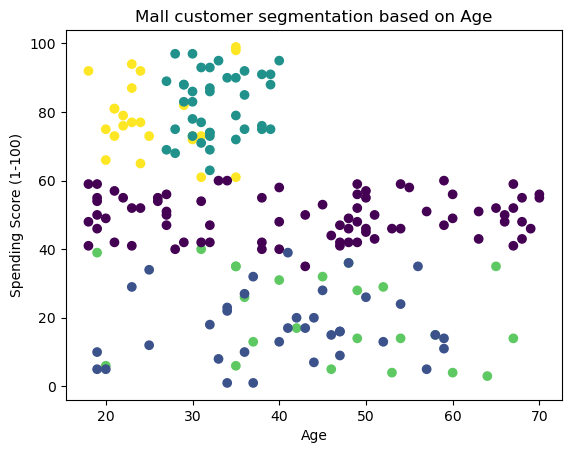

In [ ]:
# Plot the clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall customer segmentation based on Age')
plt.show()

### 3D Visualization

A 3D scatter plot is used to provide a more detailed view of the clustering results, especially when three features are involved.

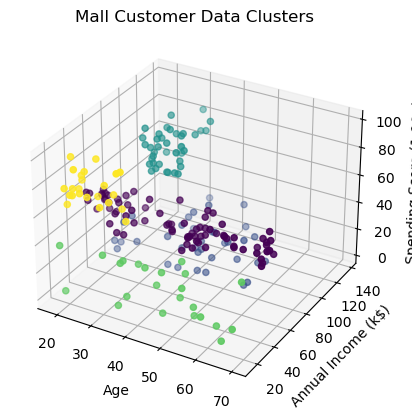

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Mall Customer Data Clusters')

plt.show()

In [ ]:
# Create the scatter plot
sc_plot = px.scatter_3d(x = data['Age'], y = data['Annual Income (k$)'], z=data['Spending Score (1-100)'],
                        color = data['Cluster'])

# Display the plot
sc_plot.show()